# H1B Labor Condition Applications (Form ETA-9035) 

In [1]:
# H1B Labor Condition Applications (Form ETA-9035)

# http://econdataus.com/h1bdata.htm

#source: US Department of Labor
#https://www.dol.gov/agencies/eta/foreign-labor/performance

#source: US Bureau of Labor Statistics 
#https://www.bls.gov/oes/tables.htm

# metadata: lca_cols
# https://www.dol.gov/sites/dolgov/files/ETA/oflc/pdfs/LCA_Record_Layout_FY2022_Q3.pdf

# DOL Guidance on Determining OES Wage Levels
# https://www.aila.org/infonet/dol-guidance-on-determining-oes-wage-levels

# 
# https://www.dol.gov/sites/doPrevailing Wage Determination Policy Guidancelgov/files/ETA/oflc/pdfs/Policy_Nonag_Progs.pdf

# git pull https://github.com/JohnBroberg/H1B_LCA.git

import pandas as pd
import matplotlib.pyplot as plt


## global variables

In [2]:

#columns to be read from LCA Excel file
lca_cols = ['CASE_NUMBER','CASE_STATUS', 'RECEIVED_DATE', 'DECISION_DATE', 'ORIGINAL_CERT_DATE'
           , 'VISA_CLASS', 'SOC_CODE', 'SOC_TITLE', 'FULL_TIME_POSITION'
           , 'TOTAL_WORKER_POSITIONS', 'EMPLOYER_NAME', 'NAICS_CODE', 'WORKSITE_WORKERS'
           , 'SECONDARY_ENTITY', 'SECONDARY_ENTITY_BUSINESS_NAME', 'WORKSITE_STATE'
           , 'WAGE_RATE_OF_PAY_FROM', 'WAGE_RATE_OF_PAY_TO', 'WAGE_UNIT_OF_PAY'
           , 'PREVAILING_WAGE', 'PW_UNIT_OF_PAY', 'PW_WAGE_LEVEL']
#           , 'PW_OES_YEAR', 'PW_OTHER_SOURCE', 'PW_OTHER_YEAR', 'PW_SURVEY_PUBLISHER', 'PW_SURVEY_NAME']



# Fiscal Year 2022

In [3]:
# Download LCA_Disclosure_Data_FY2022_Q3.xlsx

df22 = pd.read_excel("https://www.dol.gov/sites/dolgov/files/ETA/oflc/pdfs/LCA_Disclosure_Data_FY2022_Q3.xlsx"
                  , usecols = lca_cols)
#                  , index_col = None)

df22 = df22[(df22['VISA_CLASS']=='H-1B') & \
        (df22['FULL_TIME_POSITION']=='Y')]

df22

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,TOTAL_WORKER_POSITIONS,...,WORKSITE_WORKERS,SECONDARY_ENTITY,SECONDARY_ENTITY_BUSINESS_NAME,WORKSITE_STATE,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_WAGE_LEVEL
0,I-200-19274-066496,Certified - Withdrawn,2019-10-01,2022-04-20,2019-10-08,H-1B,15-1132.00,"Software Developers, Applications",Y,1,...,1,Yes,Verizon Sourcing LLC,TX,53.37,70.0,Hour,53.37,Hour,III
1,I-200-19274-066597,Certified - Withdrawn,2019-10-01,2022-04-05,2019-10-08,H-1B,11-2021.00,Marketing Managers,Y,1,...,1,No,NaN,TX,146077.63,NaN,Year,139464.00,Year,III
2,I-200-19274-066618,Certified - Withdrawn,2019-10-01,2021-12-01,2019-10-08,H-1B,25-1021.00,"Computer Science Teachers, Postsecondary",Y,1,...,1,No,NaN,NJ,110000.00,130000.0,Year,56290.00,Year,I
3,I-200-19275-067882,Certified - Withdrawn,2019-10-02,2022-03-08,2019-10-09,H-1B,15-1132.00,"Software Developers, Applications",Y,1,...,1,No,NaN,CO,88858.00,106038.0,Year,88858.00,Year,II
4,I-200-19275-067945,Certified - Withdrawn,2019-10-02,2021-12-09,2019-10-09,H-1B,15-2021.00,Mathematicians,Y,1,...,1,No,NaN,NM,121000.00,148300.0,Year,90314.00,Year,II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499270,I-200-22181-325657,Withdrawn,2022-06-30,2022-06-30,NaT,H-1B,15-1132.00,"Software Developers, Applications",Y,1,...,1,Yes,Anthem,VA,89669.00,NaN,Year,89669.00,Year,II
499271,I-200-22181-325701,Withdrawn,2022-06-30,2022-06-30,NaT,H-1B,15-1121.00,Computer Systems Analysts,Y,1,...,1,Yes,Fidelity Investments,NC,94500.00,109000.0,Year,94474.00,Year,III
499272,I-200-22181-325974,Withdrawn,2022-06-30,2022-06-30,NaT,H-1B,19-1029.00,"Biological Scientists, All Other",Y,1,...,1,No,NaN,MA,113214.00,NaN,Year,113214.00,Year,IV
499273,I-200-22181-326033,Withdrawn,2022-06-30,2022-06-30,NaT,H-1B,15-1132.00,"Software Developers, Applications",Y,1,...,1,Yes,Eaton Corporation,MI,95652.00,NaN,Year,80163.00,Year,II


In [4]:
# Add WORKSITE_EMPLOYER column

df22['WORKSITE_EMPLOYER'] = df22['EMPLOYER_NAME']
df22.loc[df22['SECONDARY_ENTITY'] == 'Yes', 'WORKSITE_EMPLOYER'] = df22['SECONDARY_ENTITY_BUSINESS_NAME']

df22[['EMPLOYER_NAME','SECONDARY_ENTITY_BUSINESS_NAME','WORKSITE_EMPLOYER']]

,EMPLOYER_NAME,SECONDARY_ENTITY_BUSINESS_NAME,WORKSITE_EMPLOYER
0,"Experis US, Inc.",Verizon Sourcing LLC,Verizon Sourcing LLC
1,"SAMSUNG ELECTRONICS AMERICA, INC.",NaN,"SAMSUNG ELECTRONICS AMERICA, INC."
2,Stevens Institute of Technology,NaN,Stevens Institute of Technology
3,"DaVita, Inc.",NaN,"DaVita, Inc."
4,"Triad National Security, LLC",NaN,"Triad National Security, LLC"
...,...,...,...
499270,"Technocorp Solutions, Inc.",Anthem,Anthem
499271,"COMPUNNEL SOFTWARE GROUP, INC",Fidelity Investments,Fidelity Investments
499272,"Novartis Institutes for BioMedical Research, Inc.",NaN,"Novartis Institutes for BioMedical Research, Inc."
499273,"KPIT Technologies, Inc.",Eaton Corporation,Eaton Corporation


In [5]:
df22['WAGE_UNIT_OF_PAY'].unique()


array(['Hour', 'Year', 'Bi-Weekly', 'Month', 'Week'], dtype=object)

In [6]:
df22['PW_UNIT_OF_PAY'].unique()

array(['Hour', 'Year', 'Month', 'Week', 'Bi-Weekly'], dtype=object)

In [7]:
# Add WAGE_RATE_OF_PAY_FROM_YR column

df22['WAGE_RATE_OF_PAY_FROM_YR'] = df22['WAGE_RATE_OF_PAY_FROM']
df22.loc[df22['WAGE_UNIT_OF_PAY'] == 'Hour', 'WAGE_RATE_OF_PAY_FROM_YR'] = df22.WAGE_RATE_OF_PAY_FROM * 2000
df22.loc[df22['WAGE_UNIT_OF_PAY'] == 'Month', 'WAGE_RATE_OF_PAY_FROM_YR'] = df22.WAGE_RATE_OF_PAY_FROM * 12
df22.loc[df22['WAGE_UNIT_OF_PAY'] == 'Week', 'WAGE_RATE_OF_PAY_FROM_YR'] = df22.WAGE_RATE_OF_PAY_FROM * 50
df22.loc[df22['WAGE_UNIT_OF_PAY'] == 'Bi-Weekly', 'WAGE_RATE_OF_PAY_FROM_YR'] = df22.WAGE_RATE_OF_PAY_FROM * 25


# Add PREVAILING_WAGE_YR column

df22['PREVAILING_WAGE_YR'] = df22['PREVAILING_WAGE']
df22.loc[df22['PW_UNIT_OF_PAY'] == 'Hour', 'PREVAILING_WAGE_YR'] = df22.PREVAILING_WAGE * 2000
df22.loc[df22['PW_UNIT_OF_PAY'] == 'Month', 'PREVAILING_WAGE_YR'] = df22.PREVAILING_WAGE * 12
df22.loc[df22['PW_UNIT_OF_PAY'] == 'Week', 'PREVAILING_WAGE_YR'] = df22.PREVAILING_WAGE * 50
df22.loc[df22['PW_UNIT_OF_PAY'] == 'Bi-Weekly', 'PREVAILING_WAGE_YR'] = df22.PREVAILING_WAGE * 25

# Add WAGE_DIFF column

df22['WAGE_DIFF'] = (df22.WAGE_RATE_OF_PAY_FROM_YR- df22.PREVAILING_WAGE_YR)/df22.PREVAILING_WAGE_YR

df22[['WAGE_RATE_OF_PAY_FROM', 'WAGE_UNIT_OF_PAY'
      , 'PREVAILING_WAGE', 'PW_UNIT_OF_PAY'
      , 'WAGE_RATE_OF_PAY_FROM_YR', 'PREVAILING_WAGE_YR', 'WAGE_DIFF']]

,WAGE_RATE_OF_PAY_FROM,WAGE_UNIT_OF_PAY,PREVAILING_WAGE,PW_UNIT_OF_PAY,WAGE_RATE_OF_PAY_FROM_YR,PREVAILING_WAGE_YR,WAGE_DIFF
0,53.37,Hour,53.37,Hour,106740.00,106740.0,0.000000
1,146077.63,Year,139464.00,Year,146077.63,139464.0,0.047422
2,110000.00,Year,56290.00,Year,110000.00,56290.0,0.954166
3,88858.00,Year,88858.00,Year,88858.00,88858.0,0.000000
4,121000.00,Year,90314.00,Year,121000.00,90314.0,0.339770
...,...,...,...,...,...,...,...
499270,89669.00,Year,89669.00,Year,89669.00,89669.0,0.000000
499271,94500.00,Year,94474.00,Year,94500.00,94474.0,0.000275
499272,113214.00,Year,113214.00,Year,113214.00,113214.0,0.000000
499273,95652.00,Year,80163.00,Year,95652.00,80163.0,0.193219


In [8]:
df22['WAGE_DIFF'].max()

7393.6415247914265

In [9]:
df22['WAGE_DIFF'].min()

-0.1031390134529148

In [10]:
len(df22[df22['WAGE_DIFF'] < 0])

39

In [11]:
rslt_df = df22[df22['WAGE_UNIT_OF_PAY'] == 'Year'] 
rslt_df

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,TOTAL_WORKER_POSITIONS,...,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_WAGE_LEVEL,WORKSITE_EMPLOYER,WAGE_RATE_OF_PAY_FROM_YR,PREVAILING_WAGE_YR,WAGE_DIFF
1,I-200-19274-066597,Certified - Withdrawn,2019-10-01,2022-04-05,2019-10-08,H-1B,11-2021.00,Marketing Managers,Y,1,...,146077.63,NaN,Year,139464.0,Year,III,"SAMSUNG ELECTRONICS AMERICA, INC.",146077.63,139464.0,0.047422
2,I-200-19274-066618,Certified - Withdrawn,2019-10-01,2021-12-01,2019-10-08,H-1B,25-1021.00,"Computer Science Teachers, Postsecondary",Y,1,...,110000.00,130000.0,Year,56290.0,Year,I,Stevens Institute of Technology,110000.00,56290.0,0.954166
3,I-200-19275-067882,Certified - Withdrawn,2019-10-02,2022-03-08,2019-10-09,H-1B,15-1132.00,"Software Developers, Applications",Y,1,...,88858.00,106038.0,Year,88858.0,Year,II,"DaVita, Inc.",88858.00,88858.0,0.000000
4,I-200-19275-067945,Certified - Withdrawn,2019-10-02,2021-12-09,2019-10-09,H-1B,15-2021.00,Mathematicians,Y,1,...,121000.00,148300.0,Year,90314.0,Year,II,"Triad National Security, LLC",121000.00,90314.0,0.339770
5,I-200-19275-068215,Certified - Withdrawn,2019-10-02,2022-06-27,2019-10-09,H-1B,11-3021.00,Computer and Information Systems Managers,Y,1,...,145000.00,NaN,Year,139547.0,Year,III,"ARCH US MI SERVICES, INC",145000.00,139547.0,0.039076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499269,I-200-22181-325649,Withdrawn,2022-06-30,2022-06-30,NaT,H-1B,15-1132.00,"Software Developers, Applications",Y,1,...,116743.00,NaN,Year,87485.0,Year,II,"National Vision, Inc.",116743.00,87485.0,0.334434
499270,I-200-22181-325657,Withdrawn,2022-06-30,2022-06-30,NaT,H-1B,15-1132.00,"Software Developers, Applications",Y,1,...,89669.00,NaN,Year,89669.0,Year,II,Anthem,89669.00,89669.0,0.000000
499271,I-200-22181-325701,Withdrawn,2022-06-30,2022-06-30,NaT,H-1B,15-1121.00,Computer Systems Analysts,Y,1,...,94500.00,109000.0,Year,94474.0,Year,III,Fidelity Investments,94500.00,94474.0,0.000275
499272,I-200-22181-325974,Withdrawn,2022-06-30,2022-06-30,NaT,H-1B,19-1029.00,"Biological Scientists, All Other",Y,1,...,113214.00,NaN,Year,113214.0,Year,IV,"Novartis Institutes for BioMedical Research, Inc.",113214.00,113214.0,0.000000


In [12]:
len(rslt_df[rslt_df['WAGE_DIFF'] < 0])

1

<AxesSubplot:>

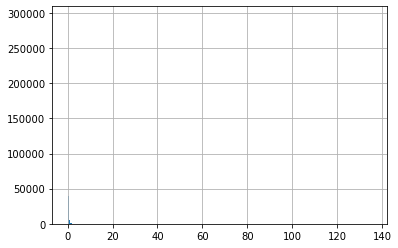

In [13]:
rslt_df = rslt_df['WAGE_DIFF']
rslt_df.hist(bins = 1000)

In [14]:
df22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493040 entries, 0 to 499274
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   CASE_NUMBER                     493040 non-null  object        
 1   CASE_STATUS                     493040 non-null  object        
 2   RECEIVED_DATE                   493040 non-null  datetime64[ns]
 3   DECISION_DATE                   493040 non-null  datetime64[ns]
 4   ORIGINAL_CERT_DATE              23587 non-null   datetime64[ns]
 5   VISA_CLASS                      493040 non-null  object        
 6   SOC_CODE                        493040 non-null  object        
 7   SOC_TITLE                       493040 non-null  object        
 8   FULL_TIME_POSITION              493040 non-null  object        
 9   TOTAL_WORKER_POSITIONS          493040 non-null  int64         
 10  EMPLOYER_NAME                   493040 non-null  object 

In [15]:
df22['PW_WAGE_LEVEL'].unique()

array(['III', 'I', 'II', 'IV', nan], dtype=object)

In [16]:
min(df22['DECISION_DATE'])

Timestamp('2021-10-01 00:00:00')

In [17]:
max(df22['DECISION_DATE'])

Timestamp('2022-06-30 00:00:00')

In [18]:
len(df22)-len(df22.drop_duplicates())

0

In [19]:
len(df22['CASE_NUMBER'])-len(df22['CASE_NUMBER'].drop_duplicates())

0

In [20]:
# Export df to compressed .csv

compression_opts = dict(method='zip', archive_name='h1b_lca_fy22.csv')  

#df22.to_csv('h1b_lca_fy22_data.zip', index=False, compression=compression_opts)  